# Books loading and data exploration

Exercise for reading, loading into a database and exploring books from our private library. 

We don't use any software or app for storing our books at home, but we do have them recorded using a predefined format, intended for easily loading the books data, something neither I or my husband did so far. Here's how a book data file looks like:

```
type=book
subtype=nonfiction
subtype=fiction

title=There Are No Electrons
subtitle=Electronics for Earthlings
author=Kenn Amdahl
alt_author=Kenneth Amdahl
publisher=Clearwater Publishing
year=1998
year_first_publication=1991
num_pages=322

isbn=0-9627815-9-2
lang=en_US

keyword=Electronics
keyword=Jargon
keyword=Static Electricity
...
```

This notebook is a first attempt of doing this data loading, for the simple pleasure of exploring a dataset of things I really love. 📚 ❤️

In [22]:
import glob

book_list = glob.glob('txt/**/*.book', recursive=True)

print ('First 10 books read:', ', '.join(book_list[:9]))

First 10 books read: txt\A\Actions_Speak.book, txt\A\Allan_Kardec.book, txt\A\Armazem_do_Folclore.book, txt\A\Assim_tudo_comecou.book, txt\A\As_dobraduras_de_Papelino.book, txt\A\A_Arte_Naif_no_Brasil.book, txt\A\A_Divina_Comedia-Inferno.book, txt\A\A_Divina_Comedia-Paraiso.book, txt\A\A_Divina_Comedia-Purgatorio.book


In [23]:
# There is a difference of 1 file; trying to find where it is

per_letter = {}
for book in book_list:
    letter = book[4:5]
    if (letter not in per_letter):
        per_letter[letter] = []
    per_letter[letter].append(book)

print (list(letter+'-'+str(len(per_letter[letter])) for letter in per_letter))

['A-47', 'B-54', 'C-106', 'D-32', 'E-14', 'F-40', 'G-52', 'H-32', 'I-4', 'J-21', 'K-64', 'L-60', 'M-79', 'N-20', 'O-16', 'P-48', 'Q-7', 'R-38', 'S-92', 'T-26', 'V-37', 'W-18', 'Y-4', 'Z-5', '_-71']


In [28]:
# In Q folder

print (per_letter['Q'])

# There is a ...E no oitavo dia.book file, that glob is taking as a hidden one.

['txt\\Q\\Cuentos_de_amor_de_locura_y_de_muerte.book', 'txt\\Q\\El_salvaje.book', 'txt\\Q\\O_Livro_Verde.book', 'txt\\Q\\Quintana_de_bolso.book', 'txt\\Q\\The_Versailles_Restaurant_Cookbook.book', 'txt\\Q\\Toda_Mafalda-17a_Ed.book', 'txt\\Q\\Yo_No_Fui-8a_Ed.book']


In [29]:
# With two globs I may be able to retrieve them all, though.

book_list = glob.glob('txt/**/*.book', recursive=True)
book_list.extend(glob.glob('txt/**/.*.book', recursive=True))

print (len(book_list))

988


Most are utf-8, but not all of them.

In [30]:
books_encoding = {}
books_encoding['utf-8'] = 0
books_encoding['cp1252'] = 0

for book in book_list:
    try:
        with open(book, 'r', encoding='utf-8') as bookfile:
            content = bookfile.readlines()
            books_encoding['utf-8'] = books_encoding['utf-8'] + 1
    except UnicodeDecodeError:
        try:
            with open(book, 'r', encoding='cp1252') as bookfile:
                content = bookfile.readlines()
                books_encoding['cp1252'] = books_encoding['cp1252'] + 1
        except Exception:
            with open(book, 'r') as bookfile:
                content = bookfile.readlines()
                if (bookfile.encoding in books_encoding):
                    books_encoding[bookfile.encoding] = books_encoding[bookfile.encoding] + 1
                else:
                    books_encoding[bookfile.encoding] = 1

print (books_encoding)

{'utf-8': 975, 'cp1252': 13}


And a few may require some wrangling, which I'll do in the original files --

In [31]:
def process_line(line):
    book_properties = {}
    if (line.strip() > ''): 
        if '=' in line:
            try:
                prop_name, prop_value = line.split('=')
                book_properties[prop_name.strip()] = prop_value.strip()
            except ValueError:
                print ('*** Incorrect property setting formatting (double equals sign):', book, "- Line: ", line.strip())
        else:
            print ('*** Incorrect property setting (no equals sign):', book, "- Line: ", line.strip())
    return book_properties

all_books = {}
for book in book_list:
    all_books[book] = []
    try:
        with open(book, 'r', encoding='utf-8-sig') as bookfile:
            content = bookfile.readlines()
            book_property = {}
            for line in content:
                book_property = process_line(line)
                if (len(book_property) > 0):
                    all_books[book].append(book_property)
    except UnicodeDecodeError:
        try:
            with open(book, 'r', encoding='cp1252') as bookfile:
                content = bookfile.readlines()
                book_property = {}
                for line in content:
                    book_property = process_line(line)
                    if (len(book_property) > 0):
                        all_books[book].append(book_property)
        except Exception:
            print ("File couldn't be parsed:", book, " - Encoding: ", bookfile.encoding)

Reloading books, after fixing the errors above.

In [33]:
import glob

def process_line(line):
    book_properties = {}
    if (line.strip() > ''): 
        if '=' in line:
            try:
                prop_name, prop_value = line.split('=')
                book_properties[prop_name.strip()] = prop_value.strip()
            except ValueError:
                print ('*** Incorrect property setting formatting (double equals sign):', book, "- Line: ", line.strip())
        else:
            print ('*** Incorrect property setting (no equals sign):', book, "- Line: ", line.strip())
    return book_properties


book_list = glob.glob('txt/**/*.book', recursive=True)
book_list.extend(glob.glob('txt/**/.*.book', recursive=True))

all_books = {}
for book in book_list:
    all_books[book] = []
    try:
        with open(book, 'r', encoding='utf-8-sig') as bookfile:
            content = bookfile.readlines()
            book_property = {}
            for line in content:
                book_property = process_line(line)
                if (len(book_property) > 0):
                    all_books[book].append(book_property)
    except UnicodeDecodeError:
        try:
            with open(book, 'r', encoding='cp1252') as bookfile:
                content = bookfile.readlines()
                book_property = {}
                for line in content:
                    book_property = process_line(line)
                    if (len(book_property) > 0):
                        all_books[book].append(book_property)
        except Exception:
            print ("File couldn't be parsed:", book, " - Encoding: ", bookfile.encoding)
            
print (len(all_books))

988


How about the encodings now, with the new dataset?

In [34]:
books_encoding = {}
books_encoding['utf-8'] = 0
books_encoding['cp1252'] = 0

for book in book_list:
    try:
        with open(book, 'r', encoding='utf-8') as bookfile:
            content = bookfile.readlines()
            books_encoding['utf-8'] = books_encoding['utf-8'] + 1
    except UnicodeDecodeError:
        try:
            with open(book, 'r', encoding='cp1252') as bookfile:
                content = bookfile.readlines()
                books_encoding['cp1252'] = books_encoding['cp1252'] + 1
        except Exception:
            with open(book, 'r') as bookfile:
                content = bookfile.readlines()
                if (bookfile.encoding in books_encoding):
                    books_encoding[bookfile.encoding] = books_encoding[bookfile.encoding] + 1
                else:
                    books_encoding[bookfile.encoding] = 1

print (books_encoding)

{'utf-8': 975, 'cp1252': 13}


Checking some book samples.

In [35]:
print (list(all_books.keys())[:9])

['txt\\A\\Actions_Speak.book', 'txt\\A\\Allan_Kardec.book', 'txt\\A\\Armazem_do_Folclore.book', 'txt\\A\\Assim_tudo_comecou.book', 'txt\\A\\As_dobraduras_de_Papelino.book', 'txt\\A\\A_Arte_Naif_no_Brasil.book', 'txt\\A\\A_Divina_Comedia-Inferno.book', 'txt\\A\\A_Divina_Comedia-Paraiso.book', 'txt\\A\\A_Divina_Comedia-Purgatorio.book']


In [36]:
print (all_books['txt\\A\\A_Divina_Comedia-Paraiso.book'])

[{'type': 'book'}, {'subtype': 'fiction'}, {'subtype': 'poetry'}, {'title': 'A Divina Comédia'}, {'volume': 'Paraíso'}, {'author': 'Dante Alighieri'}, {'translator': 'Italo Eugenio Mauro'}, {'publisher': 'Editora 34'}, {'year': '1998'}, {'year_first_publication': '1330'}, {'num_pages': '239'}, {'isbn': '85-7326-120-X'}, {'isbn': '85-7326-123-4'}, {'lang': 'pt'}, {'lang': 'it'}, {'original_lang': 'it'}, {'original_title': 'La Divina Commedia'}, {'original_volume': 'Paradiso'}, {'keyword': 'Paradise'}, {'keyword': 'Heaven'}, {'keyword': 'Spheres of Heaven'}, {'keyword': 'Primum Mobile'}, {'keyword': 'Empyrean'}, {'keyword': 'God'}, {'keyword': 'Medieval Allegories'}, {'keyword': 'Dante Alighieri'}, {'keyword': 'Durante degli Alighieri'}, {'keyword': 'Beatrice'}, {'keyword': 'Beatrice Portinari'}]


In [37]:
print (all_books['txt\\A\\A_Arte_Naif_no_Brasil.book'])

[{'type': 'book'}, {'subtype': 'nonfiction'}, {'subtype': 'artbook'}, {'title': 'A Arte Naif no Brasil'}, {'editor': 'Jacques Ardies'}, {'editor': 'Geraldo Edson de Andrade'}, {'contributor': 'Adelson do Prado'}, {'contributor': 'Agostinho Batista de Freitas'}, {'contributor': 'Alba Cavalcanti'}, {'contributor': 'Aloísio'}, {'contributor': 'Ana Maria Dias'}, {'contributor': 'Antonio de Olinda'}, {'contributor': 'Antonio Poteiro'}, {'contributor': 'Aparecida Azedo'}, {'contributor': 'Barbara Rochlitz'}, {'contributor': 'Cardosinho'}, {'contributor': 'Carlos Lousada'}, {'contributor': 'Celeste Bravo'}, {'contributor': 'Chico da Silva'}, {'contributor': 'Constância Nery'}, {'contributor': 'Crisaldo Morais'}, {'contributor': 'Dalvan'}, {'contributor': 'Dila'}, {'contributor': 'Dótoli'}, {'contributor': 'Doval'}, {'contributor': 'Edgar Calhado'}, {'contributor': 'Edivaldo'}, {'contributor': 'Edson Lima'}, {'contributor': 'Elisa Martins da Silveira'}, {'contributor': 'Elza O.S.'}, {'contribu

Storing the data in SQL, still using the key-value structure. 

In [38]:
import sqlite3

from datetime import datetime

now = datetime.now()
print ('Starting:', now)

conn = sqlite3.connect('D:\\DB\\sqlite\\books.db')
cursor = conn.cursor()
cursor.execute('delete from item')
conn.commit()
cursor.execute('delete from item_property')
conn.commit()

for bookfile in all_books:
    ins_item_cmd = 'insert into item (filename) values (?)'
    cursor.execute(ins_item_cmd, (bookfile.strip(),))
    #print (ins_item_cmd, '---', bookfile.strip())
    print ('.', end='')
    conn.commit()
    cursor.execute('select last_insert_rowid()')
    item_id = cursor.fetchall()[0][0]
    
    for prop_dict in all_books[bookfile]:
        for prop in prop_dict:
            ins_prop_cmd = 'insert into item_property (item_id, property, value) values (?, ?, ?)'
            prop_tuple = (item_id, prop, prop_dict[prop],)
            cursor.execute(ins_prop_cmd, prop_tuple)
            #print (ins_prop_cmd, '---', prop_tuple)
            conn.commit()            

conn.close()

now = datetime.now()
print ('Finished:', now)

Starting: 2021-09-14 11:27:09.559845
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

To keep documented for a next run -
```
Starting: 2021-09-14 11:27:09.559845
(...)
Finished: 2021-09-14 11:41:52.147767
```

In [43]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('D:\\DB\\sqlite\\books.db')

df = pd.read_sql_query('select * from book', conn)

In [67]:
df['year'] = pd.to_numeric(df['year'], errors = 'coerce')

df.head()

,item_id,main_title,main_subtitle,volume,publisher,isbn,year
0,1,Actions Speak,None,None,Dark Horse Comics,978-1569717585,2002.0
1,2,Allan Kardec,None,None,Editora Globo,None,2007.0
2,3,Armazém do Folclore,None,None,Editora Ática,978-85-08-07483-9,2015.0
3,4,Assim tudo começou,enigmas da criação,None,Quinteto Editorial,978-85-305-0498-4,2005.0
4,5,As dobraduras de Papelino,None,None,Nobel,85-213-0558-3,1989.0


<AxesSubplot:ylabel='Frequency'>

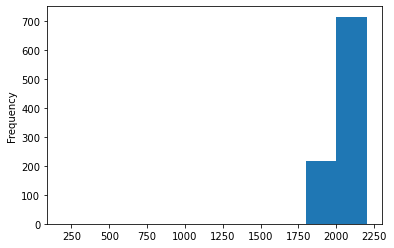

In [75]:
import matplotlib.pyplot as plt

df['year'].plot(kind = 'hist')